# Duke MLSS: Day 1

Rachel Kositsky<br>
2018-06-25

In [1]:
import numpy as np
import timeit
import tensorflow as tf
import matplotlib.pyplot as plt

## Basic Python

In [ ]:
a = [1,2,3,4]

In [ ]:
a

In [ ]:
a[:len(a)]

In [ ]:
a[:2:]

In [ ]:
for elem in "hello":
    print(elem)

In [ ]:
# Sequence comprehension
lst = [i**2 for i in range(1,11)]
lst

In [ ]:
list(range(3))

In [ ]:
x = [1, 3, 5]
y = [4, 6, 7]

# dot product
z = [x[i]*y[i] for i in range(len(x))]
z, sum(z)

In [ ]:
def dot_product(x, y):
    assert(len(x) == len(y))
    return sum([x[i]*y[i] for i in range(len(x))])

In [ ]:
dot_product(x, y)

## Numpy

In [ ]:
# Nd-array = n-dimensional array
# it's faster because it doesn't have to do checks
a = np.array([1, 2, 3])
b = np.array([4, 6, 8])

In [ ]:
a.dot(b)

In [ ]:
np.dot(a, b)

## MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Future:
# train, test = tf.keras.datasets.mnist.load_data()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
np.shape(mnist.train.images)
mnist.train.images.shape

(55000, 784)

In [4]:
np.sqrt(784)
# 28x28 images
# 55k images

28.0

In [5]:
# Look at everything defined in namespace
dir()

['In',
 'Out',
 '_',
 '_3',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'input_data',
 'mnist',
 'np',
 'plt',
 'quit',
 'tf',
 'timeit']

In [ ]:
help(mnist)

In [ ]:
mnist.train.labels.shape

In [ ]:
# One hot encoding
# Everything is 0 except for the position corresponding to the digit
# e.g. image 0 is a 7
mnist.train.labels[0]

In [ ]:
# Measure of similarity of two images, unnormalized
np.dot(mnist.train.images[0], mnist.train.images[1])

In [ ]:
# Get the norm
a = np.array([1,2,3,4])
#a = np.array([.8, .6])
print("Norm of a:", np.linalg.norm(a))
print("Normalized a:", a / np.linalg.norm(a))
print("Norm of a after normalization:", np.linalg.norm(a / np.linalg.norm(a)))

In [6]:
# Get the norm of each image
image_norms = np.linalg.norm(mnist.train.images, axis=1)

In [ ]:
image_norms

In [ ]:
image_norms.shape

In [ ]:
m = np.array([[1,2,3], [4,5,6], [7,8,9]])
m

In [ ]:
# Automatic broadcasting by column: repeat row three times: [[1,2,3], [1,2,3], [1,2,3]]
# Divide each column by the array given
m / np.array([1,2,3])

In [ ]:
# Know the shape
# repeat by columns three times: [[1,1,1], [2,2,2], [3,3,3]]
m / np.array([1,2,3]).reshape([3, 1])

In [ ]:
# Reshape -1: fill in
np.array([1,2,3, 4, 5, 6]).reshape([2, -1])

In [ ]:
# back to image norms
# make it into a column, then divide
image_norms.reshape([55000, 1])

In [7]:
normalized_images = mnist.train.images / image_norms.reshape([len(mnist.train.images), 1])
normalized_images.shape

(55000, 784)

In [ ]:
np.linalg.norm(normalized_images, axis=1)
np.linalg.norm(normalized_images, axis=1).shape

## Train logistic regression model using TensorFlow

Can also get other, lower, accuracies using other ways

Check class notes

Idea of tensorflow: make a computational graph. Binary operations that lead to loss function.

```
b  m x  y
\  \/  / 
 \ *  /
  \| /
   + |
   \/
   -
   |
   square
   |
   loss
   ```

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
def show(num):
    plt.axis('off')
    plt.imshow(num.reshape(-1,28), cmap='gray')

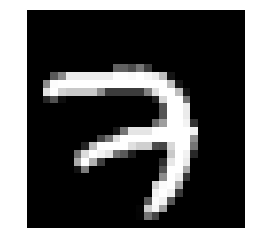

In [9]:
show(mnist.train.images[0])

In [10]:
mnist.train.images.dot(normalized_images[-1].reshape([784, 1]))

array([[3.4697518],
       [4.7063866],
       [2.2834907],
       ...,
       [3.397404 ],
       [2.6706285],
       [7.976755 ]], dtype=float32)

In [47]:
# The operations of this graph are empty
tf.reset_default_graph()
g = tf.get_default_graph()
g.get_operations()

[]

In [48]:
# Add placeholder data. Something * 784 pixels.
# Later: X = 100 images, etc.
# Add weights and biases

X = tf.placeholder(tf.float32, [None, 784]) # data
y = tf.placeholder(tf.float32, [None, 10])  # labels
W = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))  # weight
b = tf.Variable(tf.truncated_normal([10], stddev=0.1)) # bias
mult_result = tf.matmul(X, W)
scores = tf.add(mult_result, b)

loss = tf.nn.softmax_cross_entropy_with_logits(logits=scores, labels=y)
avg_loss = tf.reduce_mean(loss)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
# learning rate = 0.01. pass it the node that we want it to minimize: the loss node

# To implement stochastic gradient descent, will feed in minibatches for X, y
initialize_all = tf.global_variables_initializer()
g.get_operations()

[<tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'truncated_normal/shape' type=Const>,
 <tf.Operation 'truncated_normal/mean' type=Const>,
 <tf.Operation 'truncated_normal/stddev' type=Const>,
 <tf.Operation 'truncated_normal/TruncatedNormal' type=TruncatedNormal>,
 <tf.Operation 'truncated_normal/mul' type=Mul>,
 <tf.Operation 'truncated_normal' type=Add>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'truncated_normal_1/shape' type=Const>,
 <tf.Operation 'truncated_normal_1/mean' type=Const>,
 <tf.Operation 'truncated_normal_1/stddev' type=Const>,
 <tf.Operation 'truncated_normal_1/TruncatedNormal' type=TruncatedNormal>,
 <tf.Operation 'truncated_normal_1/mul' type=Mul>,
 <tf.Operation 'truncated_normal_1' type=Add>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.

#### 3 types of nodes that hold numbers:
1. placeholders for data/label
2. variables that are being updated every time the graph is run
3. constant

In [49]:
# Create a session
sess = tf.Session()

In [50]:
# Initialize every node in the graph by running node initialize_all
sess.run(initialize_all)

In [53]:
sess.run(avg_loss, feed_dict = {X: mnist.train.images[:100],
                         y: mnist.train.labels[:100]})

2.7006936

In [56]:
np.exp(2.7) # 14.8% correct at random initialization

14.879731724872837

In [57]:
# Do one step
sess.run(train_step, feed_dict = {X: mnist.train.images[:100],
                                  y: mnist.train.labels[:100]})

In [58]:
sess.run(avg_loss, feed_dict = {X: mnist.train.images[:100],
                         y: mnist.train.labels[:100]})

2.8420691

In [59]:
np.exp(2.84) # 17.1% correct after one train step

17.115765537145876

In [81]:
# Run more
batch_size = 100
num_iters = int(len(mnist.train.images)/batch_size)
for i in range(num_iters):
    start = i*batch_size
    end=(i+1)*batch_size
    sess.run(train_step, feed_dict = {X: mnist.train.images[start:end],
                                       y: mnist.train.labels[start:end]})


In [73]:
test_loss = sess.run(avg_loss, feed_dict = {X: mnist.test.images,
                         y: mnist.test.labels})
print("Test loss: {}\nPercent correct: {}".format(test_loss, np.exp(test_loss)))

Test loss: 0.3322853446006775
Percent correct: 1.3941506147384644


In [71]:
computed_scores = sess.run(scores, feed_dict = {X: mnist.test.images, y: mnist.test.labels})
np.argmax(computed_scores, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [82]:
# See how many you get right
computed_scores = sess.run(scores, feed_dict = {X: mnist.test.images, y: mnist.test.labels})
num_test_corr = sum(np.argmax(computed_scores, axis=1) == np.argmax(mnist.test.labels, axis=1))
num_test_images = len(mnist.test.labels)
print("Got {} right out of {} images = {:2.2f}% accuracy".format(num_test_corr, num_test_images, 100.0*num_test_corr/num_test_images))

Got 9074 right out of 10000 images = 90.74% accuracy


# Use ReLU

In [83]:
# The operations of this graph are empty
tf.reset_default_graph()
g = tf.get_default_graph()
g.get_operations()

# Add placeholder data. Something * 784 pixels.
# Later: X = 100 images, etc.
# Add weights and biases
inner_units = 100
X = tf.placeholder(tf.float32, [None, 784]) # data
y = tf.placeholder(tf.float32, [None, 10])  # labels
W = tf.Variable(tf.truncated_normal([784, inner_units], stddev=0.1))  # weight
b = tf.Variable(tf.truncated_normal([inner_units], stddev=0.1)) # bias
mult_result = tf.matmul(X, W)
latent_scores = tf.add(mult_result, b)
W2 = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))  # weight
b2 = tf.Variable(tf.truncated_normal([10], stddev=0.1)) # bias
mult_result2 = tf.matmul(latent_scores, W2)
latent_scores = tf.add(mult_result2, b2)


loss = tf.nn.softmax_cross_entropy_with_logits(logits=scores, labels=y)
avg_loss = tf.reduce_mean(loss)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
# learning rate = 0.01. pass it the node that we want it to minimize: the loss node

# To implement stochastic gradient descent, will feed in minibatches for X, y
initialize_all = tf.global_variables_initializer()
g.get_operations()

ValueError: Dimensions must be equal, but are 100 and 784 for 'MatMul_1' (op: 'MatMul') with input shapes: [?,100], [784,10].

In [84]:
int(7.7)

7